# Linear and Polynomial Regression

In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn.apionly as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

In [5]:
iris2 = pd.read_csv('IRIS.csv')

In [6]:
def covariance (X, Y):
    xhat=np.mean(X)
    yhat=np.mean(Y)
    epsilon=0
    for x,y in zip (X,Y):
        epsilon=epsilon+(x-xhat)*(y-yhat)
    return epsilon/(len(X)-1)

In [7]:
print (covariance ([1,3,4], [1,0,2]))
print (np.cov([1,3,4], [1,0,2]))

0.5
[[2.33333333 0.5       ]
 [0.5        1.        ]]


In [8]:
def correlation (X, Y):
    return (covariance(X,Y)/(np.std(X,  ddof=1)*np.std(Y,  ddof=1))) ##We have to indicate ddof=1 the unbiased std

In [9]:
print (correlation ([1,1,4,3], [1,0,2,2]))
print (np.corrcoef ([1,1,4,3], [1,0,2,2]))

0.8703882797784892
[[1.         0.87038828]
 [0.87038828 1.        ]]


C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


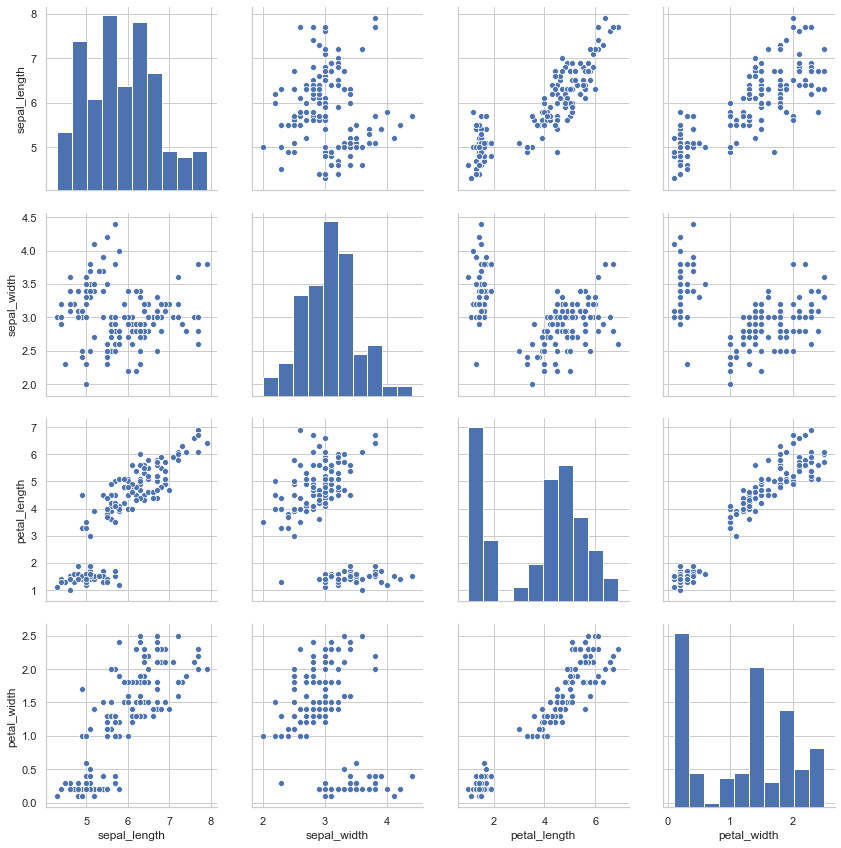

In [10]:
sns.pairplot(iris2, size=3.0)

In [11]:
X=iris2['petal_width']
Y=iris2['petal_length']

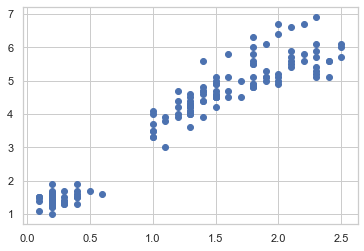

In [12]:
plt.scatter(X,Y)

In [13]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [14]:
def error(alpha, beta, x_i, y_i): #L1
    return y_i - predict(alpha, beta, x_i)

def sum_sq_e(alpha, beta, x, y): #L2
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [15]:
def correlation_fit(x, y):
    beta = correlation(x, y) * np.std(y, ddof=1) / np.std(x,ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

In [16]:
alpha, beta = correlation_fit(X, Y)
print(alpha)
print(beta)

1.0905721458773798
2.225885306553911


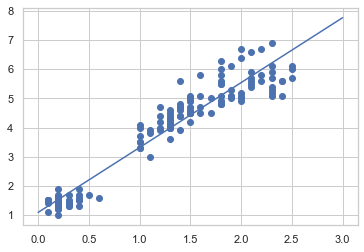

In [17]:
plt.scatter(X,Y)
xr=np.arange(0,3.5)
plt.plot(xr,(xr*beta)+alpha)

In [20]:
predict(alpha, beta, X[0])

array([1.53574921])

In [21]:
Y[0]

1.4

C:\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0935e-17): result may not be accurate.
  overwrite_a=True).T


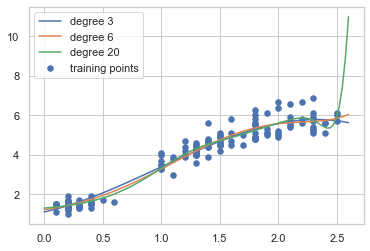

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

ix=iris2['petal_width']
iy=iris2['petal_length']

# generate points used to represent the fitted function 
x_plot = np.linspace(0, 2.6, 100)

# create matrix versions of these arrays
X = ix[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

plt.scatter(ix, iy, s=30, marker='o', label="training points")

for count, degree in enumerate([3, 6, 20]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, iy)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc='upper left')

plt.show()